## Setting up VizDoom

In [1]:
# Import vizdoom for game env
from vizdoom import * 
# Import random for action sampling
import random
# Import time for sleeping
import time 
# Import numpy for identity matrix
import numpy as np
import os

In [2]:
# Setup game
game = DoomGame()
game.load_config('vizdoom/VizDoom/scenarios/basic.cfg')
game.init()

In [4]:
# This is the set of actions we can take in the environment
actions = np.identity(3, dtype=np.uint8)

In [46]:
# Loop through episodes 
episodes = 10 
for episode in range(episodes): 
    # Create a new episode or game 
    game.new_episode()
    # Check the game isn't done 
    while not game.is_episode_finished(): 
        # Get the game state 
        state = game.get_state()
        # Get the game image 
        img = state.screen_buffer
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions),4)
        # Print rewward 
        print('reward:', reward) 
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)

reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: 98.0
Result: -169.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4

KeyboardInterrupt: 

In [3]:
game.close()

## Converting to a Gym Environment

In [5]:
# Import environment base class from OpenAI Gym
from gymnasium import Env
# Import gym spaces 
from gymnasium.spaces import Discrete, Box
# Import opencv 
import cv2

In [6]:
# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config('vizdoom/VizDoom/scenarios/basic.cfg')
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game 
        self.game.init()
        
        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(3)
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step 
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) 
        
        # Get all the other stuff we need to return 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = {"ammo": ammo}
        else: 
            state = np.zeros(self.observation_space.shape)
            info = {"ammo": 0}
        
        terminated = self.game.is_episode_finished()
        truncated = False  # Assuming no truncation logic

        return state, reward, terminated, truncated, info 
    
    # Define how to render the game or environment 
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self, seed=None):
        if seed is not None:
            self.game.set_seed(seed)
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        if state is not None:
            state = self.grayscale(state)
        else:
            state = np.zeros(self.observation_space.shape)
    
        # Initialize information dictionary, can include more relevant information
        info = {
            'info': 'Initial state of the game'
        }
    
        return (state, info)
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()

In [7]:
env = VizDoomGym(render=True)

In [10]:
env.close()

In [8]:
# Import Environment checker
from stable_baselines3.common import env_checker

In [9]:
env_checker.check_env(env)

In [11]:
state = env.reset()

ViZDoomIsNotRunningException: Controlled ViZDoom instance is not running or not ready.

[[[35 39 39 ... 39 39 39]
  [59 67 59 ... 67 67 91]
  [79 79 79 ... 79 91 91]
  ...
  [19 19 11 ... 47 47 55]
  [19 27 19 ... 47 47 47]
  [11 19 19 ... 27 19 19]]

 [[35 39 39 ... 39 39 39]
  [59 67 59 ... 67 67 91]
  [79 79 79 ... 79 91 91]
  ...
  [19 19 11 ... 47 47 55]
  [19 27 19 ... 47 47 47]
  [11 19 19 ... 27 19 19]]

 [[35 39 39 ... 39 39 39]
  [59 67 59 ... 67 67 91]
  [79 79 79 ... 79 91 91]
  ...
  [19 19 11 ... 47 47 55]
  [19 27 19 ... 47 47 47]
  [11 19 19 ... 27 19 19]]]


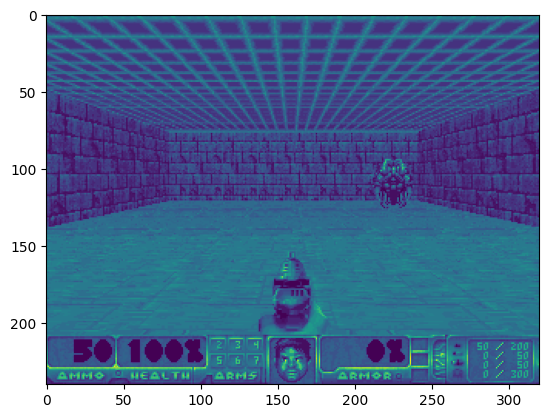

In [137]:
from matplotlib import pyplot as plt 
print(env.game.get_state().screen_buffer)
plt.imshow(env.game.get_state().screen_buffer[2,:,:])

In [12]:
from stable_baselines3.common.callbacks import BaseCallback

class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [13]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

In [14]:
callback = TrainAndLoggingCallback(check_freq=1000, save_path=CHECKPOINT_DIR)

## Train Model

In [15]:
# import ppo for training
from stable_baselines3 import PPO

In [16]:
# Non rendered environment
env = VizDoomGym()

In [17]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=512)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [18]:
model.learn(total_timesteps=10000, callback=callback)

Logging to ./logs/log_basic/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50.7     |
|    ep_rew_mean     | -188     |
| time/              |          |
|    fps             | 30       |
|    iterations      | 1        |
|    time_elapsed    | 16       |
|    total_timesteps | 512      |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 42.4         |
|    ep_rew_mean          | -136         |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 2            |
|    time_elapsed         | 46           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 0.0052123913 |
|    clip_fraction        | 0.224        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance 

## Test Model

In [24]:
# Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

# Reload model from disc
model = PPO.load('./train/train_basic/best_model_10000')

# Create rendered environment
env = VizDoomGym(render=True)

# Evaluate mean reward for 10 games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10)

env.close()

/Users/ambarchakraborty/Documents/Projects/Doom AI/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
